# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [52]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

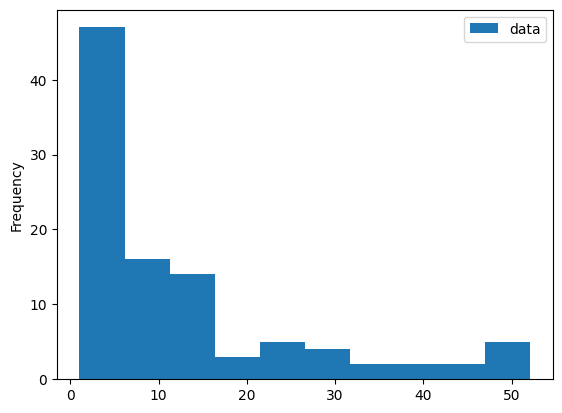

In [53]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

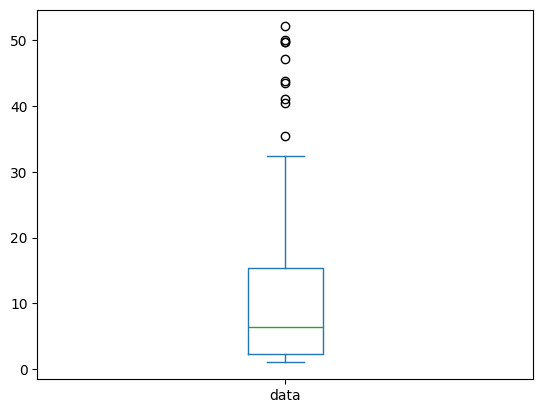

In [54]:
df.plot.box()

Histogram: 
Pros: 
- Easy to read and comprehend visually. 
- Easy to determine Mode. 
    
Cons:
- No labels present on the graph which makes it hard to interpret what the data represents.  
- The data is not accurately represented in the histogram. The 75th percentile is 15.46 which is not graphically clear, the 75th percentile looks like it would be much higher based on the histogram.  
- Not enough tick marks on the axis which make it hard to determine exact values. 

    
Box Plot: 
Pros: 
- Easy to determine Median. 
- Outliers highlighted for removal before Mean calculation.
- Able to clearly determine quartiles.  
    
Cons: 
- No labels for data points and it is unclear what the graph is measuring. 
- Unable to calculate mean from the graph since we do not have all of the necessary points. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

Who, What, Why: The following dataset is performs a Diabetes Risk Analysis on the Pima Indians Dataset which includes health and lifestyle data from the Native American tribe living in Arizona and Mexico. Some health metric features analyzed include age, blood pressure, BMI, glucose level, and diabetes diagnoses. In this case, the target variable will be diabetes outcome (yes diabetes or no diabetes). The goal of analyzing this dataset, is to be able to find key features that indicate who is more likely to develop Diabetes. This information can be used to slow or stop the onset of diabetes and aid in population health. 

In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats 
from scipy.stats import zscore 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [56]:
# load the dataset 
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
# missing values exploration 
null_values = df.isnull()
null_sum = df.isnull().sum()
print(null_sum)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Feature Information: 

Pregnancies = the number of pregnancies this individual has had 

Glucose = the concentration measured from an oral glucose tolerance test

BloodPressure = diastolic blood pressure (units of mm Hg)

SkinThickness = the fold thickenss from the triceps region (units of mm)

Insulin = 2-hour serum insulin (units mu U/ml)

BMI = body mass index (units kg/(height)^2)

DiabetesPedigreeFunction = family history results in increased likelihood of transfer 

Age = age (units of years)

Outcome = whether an individual has diabetes (1) or does not have diabetes (0)


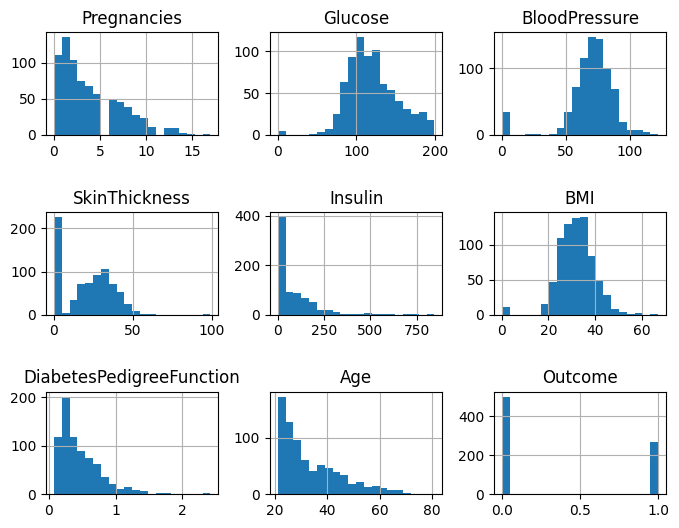

In [58]:
# histograms for each feature or column

df.hist(figsize=(8,6), bins=20)
plt.subplots_adjust(hspace=0.75)


Text(0.5, 1.0, 'Swarm Plot Comparing Glucose Levels with Diabetes Diagnoses')

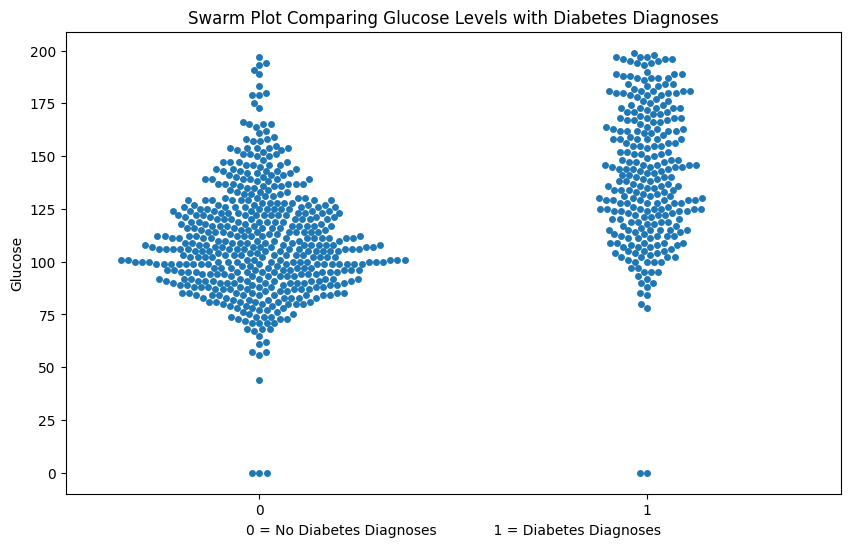

In [59]:
# swarm plot 

plt.figure(figsize=(10,6))
sns.swarmplot(x='Outcome', y='Glucose', data=df)
plt.xlabel('0 = No Diabetes Diagnoses             1 = Diabetes Diagnoses')
plt.title('Swarm Plot Comparing Glucose Levels with Diabetes Diagnoses')

/tmp/ipykernel_1903/1545733101.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BMI'], shade=True)


Text(0.5, 1.0, 'KDE Plot for BMI (kg/(height)^2)')

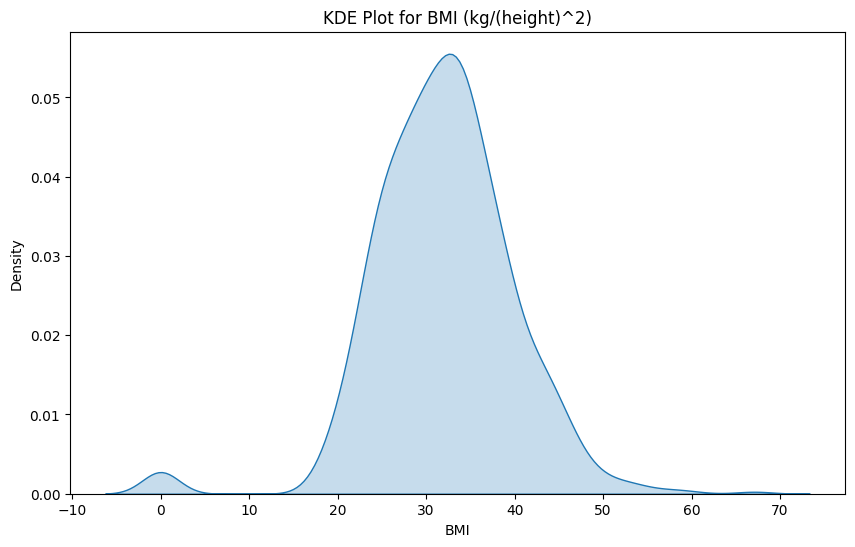

In [60]:
# kde plot 

plt.figure(figsize=(10,6))
sns.kdeplot(df['BMI'], shade=True)
plt.title('KDE Plot for BMI (kg/(height)^2)')



Text(0.5, 0, 'Outcome: 0 = No Diabetes Diagnoses        1 = Diabetes Diagnoses')

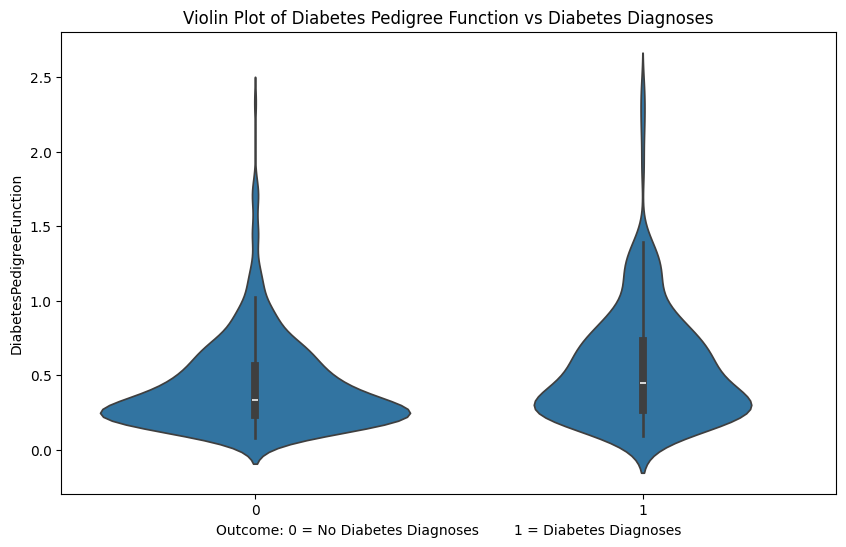

In [61]:
# violin plot 

plt.figure(figsize=(10,6))
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Violin Plot of Diabetes Pedigree Function vs Diabetes Diagnoses')
plt.xlabel('Outcome: 0 = No Diabetes Diagnoses        1 = Diabetes Diagnoses')

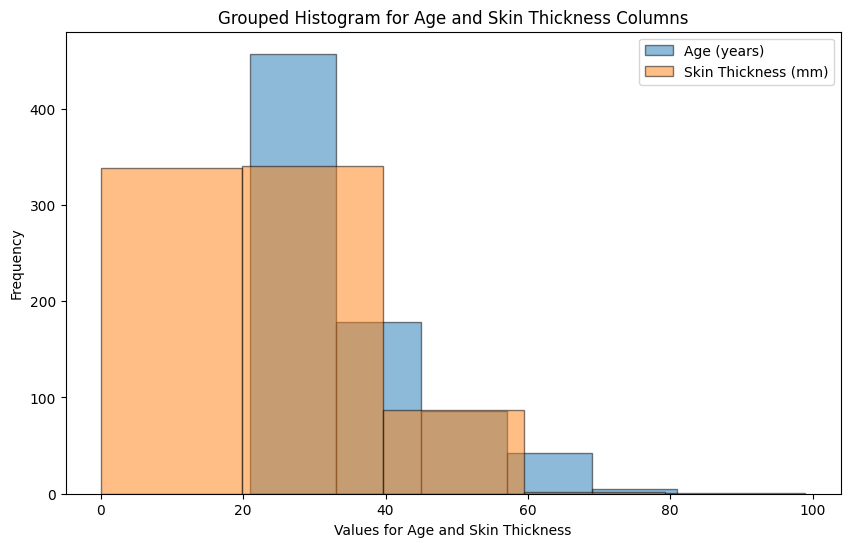

In [62]:
# grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.


df_copy = pd.DataFrame(df)

plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=5, alpha=0.5, label='Age (years)', edgecolor='black')
plt.hist(df['SkinThickness'], bins=5, alpha=0.5, label='Skin Thickness (mm)', edgecolor='black')
plt.title('Grouped Histogram for Age and Skin Thickness Columns')
plt.xlabel('Values for Age and Skin Thickness')
plt.ylabel('Frequency')
plt.legend()

Text(0.5, 0, 'Outcome: 0 = No Diabetes Diagnoses        1 = Diabetes Diagnoses')

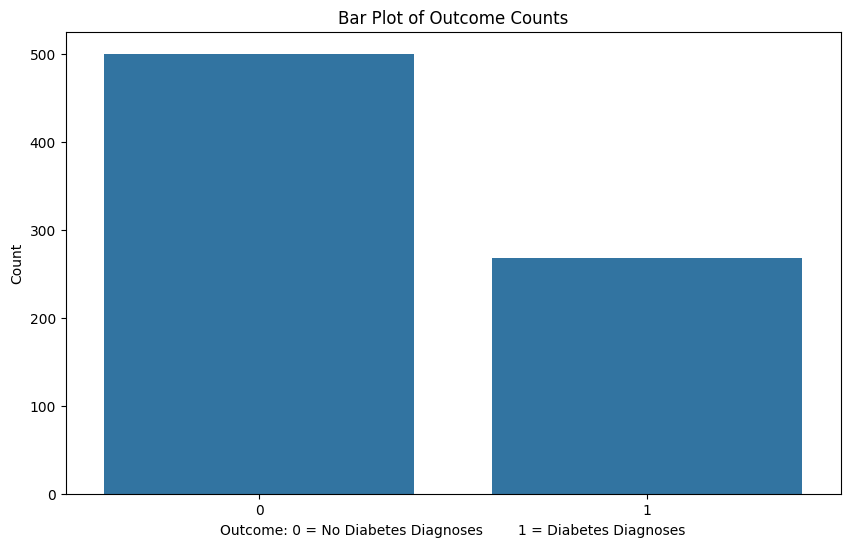

In [63]:
# Draw a bar plot to indicate total counts of each categorical variable in a given column.
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=df_copy)
plt.title('Bar Plot of Outcome Counts')
plt.ylabel('Count')
plt.xlabel('Outcome: 0 = No Diabetes Diagnoses        1 = Diabetes Diagnoses')

In [64]:
# Find means, medians, and modes.

mean = df.mean()
print('Feature Means:', mean)
median = df.median()
print("Feature Medians:", median)
mode = df.mode().iloc[0]
print('Feature Modes:', mode)

Feature Means: Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
Feature Medians: Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
Feature Modes: Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     

Conclusions: 

For this section, I will discuss each individual feature of the dataset as well as how these features interact with each other. Starting with the column 'Pregnancies', the graph has an overall decreasing linear slope and right skewed distribution which highlights that fewer people get pregnant very frequently. The 'Glucose' feature has a normal distribution but highlights the fact that human blood glucose levels typically flucutate between 75-150. The 'BloodPressure' feature has a normal distribution between 50-100 mm Hg with an outlier between 0-10 mm Hg. This blood pressure level is very low indicating that it was not taken correctly or the patient was very ill when the measurement was taken. 'SkinThickness' has a large count of 0 mm in addition to a normal distribution with median value of 23 mm. This value of 0 is impossible for humans to reach which indicates that the measurement was not taken and the value of 0 was placed in any nulls. 'Insulin' has a right-skewed distriution and a few outliers. 'BMI' has a fairly normal distiburion and mean value of 31.99 which is fairly high indicating obesity in the Pima population. The 'DiabetesPedigreeFunction' feature exhibits right-skewed distribution indicating there are more people with fewer family members with a history of diabetes. The 'Age' feature is a right-skewed distribution but fluctuates between the age of 20-65 years old. This reveals that diabetes is most frequently diagnosed or developed by patients at a lower age. This mode age proves this theory with a value of 22 years old. Last, we have the 'Outcome' feature which is bimodal and categorical. This feature represents patients who either have been diagnosed with diabetes (value of 1) or who have not been diagnosed with diabetes (value of 0). 



I would now like to discuss a few faults of this dataset. It appears that whoever compiled this dataset whether it be physicians, nurses, or researchers, decided to use the value of 0 to subsitute all null values. This creates outliers for many categories of this data set such as Glucose, BloodPressure, BMI, and SkinThickness.These null values are do to a lack of information which could be due to the physician not taking that specific measurement when treating a patient. By substituing 0 for null values, the data is skewed to inaccurately reflect the patients. This could be remedied by using the mean to determine what should be used in place of the null values instead of just replacing the null values with 0. 

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

Below, I have reproduced the Square Area Chart on page 60 in the Storytelling With Data book. 

/tmp/ipykernel_1903/901096231.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[Text(1, 0.0, 'Blue = Hired'),
 Text(1, 0.5, 'Grey = Interview'),
 Text(1, 1.0, 'White = Phone Screen')]

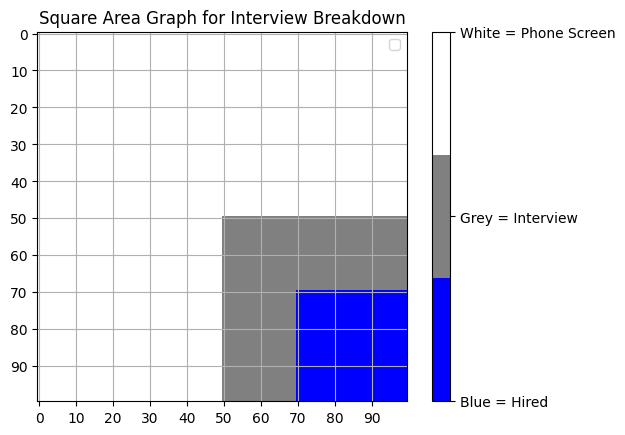

In [65]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

df = [100, 25, 9]
data = np.ones((100,100))
data[50:100, 50:100] = 0.5
data [70:100, 70:100] = 0
# data = np.random.rand(10,10)
# sns.heatmap(df, cmap='viridis', cbar=True)
cmap = plt.cm.colors.ListedColormap(['blue', 'grey', 'white'])
cax = plt.imshow(data, cmap=cmap, interpolation='nearest')
plt.grid(which='both')
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,100,10))
plt.grid(which='minor')
plt.title('Square Area Graph for Interview Breakdown')
plt.legend()
cbar = plt.colorbar(cax, ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(['Blue = Hired', 'Grey = Interview', 'White = Phone Screen'])

